In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import metrics
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import os
import json
from konlpy.tag import Okt
import pymysql.cursors
import pandas as pd
import re

In [22]:
conn = pymysql.connect(host='localhost',
                       user='lyunj',
                       password='Dldbswo77@',
                       db='coupang_review',  # coupang_review 스키마 생성 필요
                       charset='utf8',
                       cursorclass=pymysql.cursors.DictCursor)

try:
    with conn.cursor() as curs:
        sql = 'select rating,review_content, review_len from csv_save where (rating =1 or rating=5) and review_len <> 0'
        curs.execute(sql)
        result = curs.fetchall()
        df = pd.DataFrame(result)
finally:
    conn.close()

In [23]:
okt = Okt()

In [20]:
def tokenize(review):
    return ['/'.join(t) for t in okt.pos(review, norm=True, stem=True)]

In [ ]:
# reviews = []
# print(df.loc[1:5])
# for i in df.index:
#     if i % 100 == 0:
#         print('진행개수 : ', i)
#     row = df._get_value(i, 'review_content')
#     row = re.sub('\n', '', row)
#     row = re.sub('\u200b', '', row)
#     row = re.sub('\xa0', '', row)
#     row = re.sub('([a-zA-Z])', '', row)
#     row = re.sub('[ㄱ-ㅎㅏ-ㅣ]+', '', row)
#     row = re.sub(
#         '[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', row)
#     reviews.append([tokenize(row), str(df._get_value(i, 'rating')),str(df._get_value(i,'review_len'))])

# with open('review_token.json', 'w', encoding='utf-8') as make_file:
#     json.dump(reviews, make_file, ensure_ascii=False, indent='\t')

In [4]:
import nltk

with open('review_token.json', encoding='utf-8') as f:
    review_token = json.load(f)

tokens = [t for d in review_token for t in d[0] if ((
    t.split('/')[1] == 'Noun') or (t.split('/')[1] == 'Adjective'))]

text = nltk.Text(tokens, name='NMSC')

print(len(set(text.tokens)))

34256


In [82]:
tokens_1 = [t for d in review_token for t in d[0] if (((
    t.split('/')[1] == 'Noun') or
    (t.split('/')[1] == 'Adjective')) and d[1] == '1')]

text_1 = nltk.Text(tokens_1, name='NMSC')

rating_1 = text_1.vocab().most_common(1000)

tokens_5 = [t for d in review_token for t in d[0] if (((
    t.split('/')[1] == 'Noun') or
    (t.split('/')[1] == 'Adjective')) and d[1] == '5')]
text_5 = nltk.Text(tokens_5, name='NMSC')

rating_5 = text_5.vocab().most_common(1000)

rating_1_word = [x[0] for x in rating_1]
rating_5_word = [x[0] for x in rating_5]

common_word = [x for x in rating_1_word if x in rating_5_word]

rating_1_word_not_common = [x for x in rating_1_word if x not in common_word]
rating_5_word_not_common = [x for x in rating_5_word if x not in common_word]

# tokens_1_word = [x for x in tokens_1 if x not in common_word]
# tokens_5_word = [x for x in tokens_5 if x not in common_word]

In [106]:
print(len(common_word))
print(len(rating_1_word_not_common))
print(len(rating_5_word_not_common))

697
303
303


In [83]:
text_count = text.vocab()
text_count

FreqDist({'좋다/Adjective': 53885, '있다/Adjective': 38447, '같다/Adjective': 27305, '구매/Noun': 23415, '사용/Noun': 20400, '것/Noun': 19833, '없다/Adjective': 19802, '제품/Noun': 18462, '때/Noun': 17208, '가격/Noun': 16418, ...})

In [84]:
# common_token = [int(text_count[x]) for x in common_word]
# rating_1_token = [int(text_count[x]) for x in rating_1_word_not_common]
# rating_5_token = [int(text_count[x]) for x in rating_5_word_not_common]

In [7]:
# common_max = max(common_token)
# common_min = min(common_token)
# rating_1_max = max(rating_1_token)
# rating_1_min = min(rating_1_token)
# rating_5_max = max(rating_5_token)
# rating_5_min = min(rating_5_token)
# print(common_max)
# print(common_min)
# print(rating_1_max)
# print(rating_1_min)
# print(rating_5_max)
# print(rating_5_min)

53885
3128
3576
879
7264
2401


In [85]:
common_word_sort = [x for x in text_count if x in common_word]
rating_1_word_sort = [x for x in text_count if x in rating_1_word_not_common]
rating_5_word_sort = [x for x in text_count if x in rating_5_word_not_common]

In [110]:
plt.scatter(rating_1_word_sort,rating_5_word_sort)
plt.xlabel("review_score", fontsize=13)
plt.ylabel("n", fontsize=13)
plt.grid()
plt.show()

KeyboardInterrupt: 

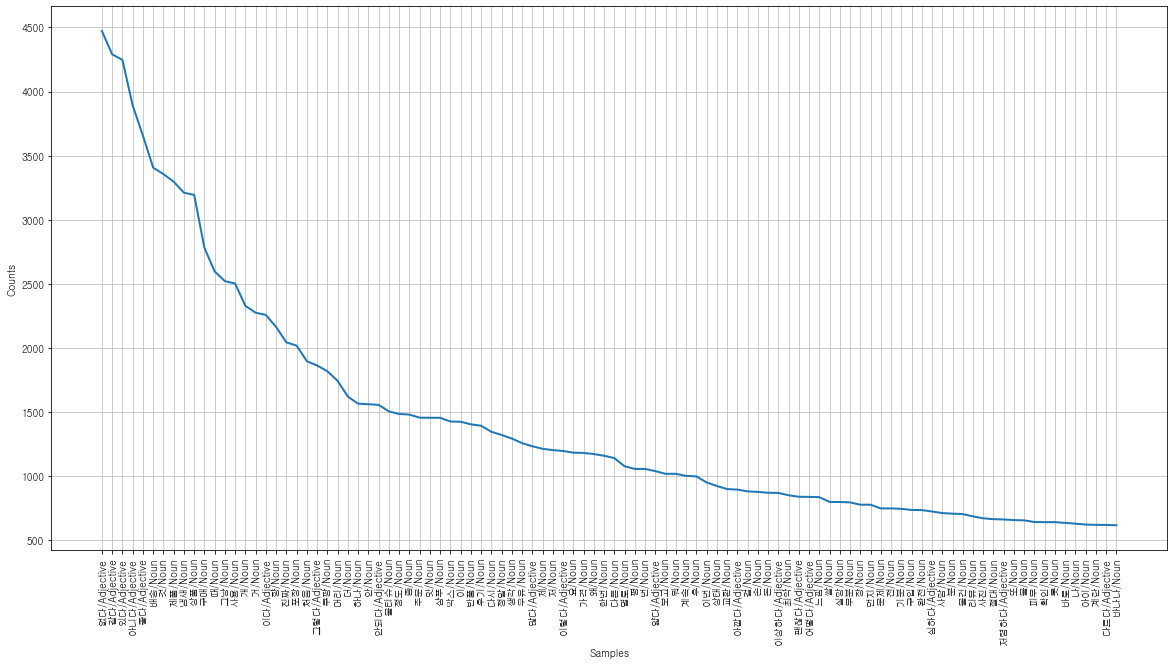

In [11]:
font_fname = 'c:/windows/fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)
plt.figure(figsize=(20, 10))
nltk.Text(tokens_1).plot(100)

In [88]:
com_ma = 0
com_mi = 1000000000
for f in common_word_sort[0:650]:
    for doc,_,_ in review_token:
        co = doc.count(f)
        if co > com_ma:
            com_ma = co
        if co < com_mi:
            com_mi = co

one_ma = 0
one_mi = 1000000000
for f in rating_1_word_sort[0:300]:
    for doc,_,_ in review_token:
        co = doc.count(f)
        if co > one_ma:
            one_ma = co
        if co < one_mi:
            one_mi = co

five_ma = 0
five_mi = 1000000000
for f in rating_5_word_sort[0:300]:
    for doc,_,_ in review_token:
        co = doc.count(f)
        if co > five_ma:
            five_ma = co
        if co < five_mi:
            five_mi = co

In [89]:
def norm_common(x):
    return (x - com_mi) / (com_ma - com_mi)
def norm_rating_1(x):
    return (x - one_mi) / (one_ma - one_mi)
def norm_rating_5(x):
    return (x - five_mi) / (five_ma - five_mi)

In [90]:
selected_words = [f for f in common_word_sort[0:650]] + [f for f in rating_1_word_sort[0:300]] + [f for f in rating_5_word_sort[0:300]]

In [107]:
# selected_words = [f[0] for f in text.vocab().most_common(1250)]

In [109]:
def term_frequency(doc,length):
    result = []
    count = 0
    for word in selected_words:
        if(count < 650):
            result.append(norm_common(doc.count(word)))
        if(650 <= count < 950):
            result.append(norm_rating_1(doc.count(word)))
        if(950 <= count < 1250):
            result.append(norm_rating_5(doc.count(word)))
        count += 1
    return result
#     return [doc.count(word) for word in selected_words]

X = [term_frequency(d,length) for d, _,length in review_token]
y = ['1' if d == '1' else '0' for _, d,_ in review_token]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=1004)

x_train = np.asarray(X_train).astype('float32')
x_test = np.asarray(X_test).astype('float32')

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [92]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1250,)))
# model.add(layers.MaxPooling1D(
#     pool_size=2, strides=1, padding="valid", data_format="channels_last"))
# model.add(layers.Dropout(0.3))
# model.add(layers.Conv1D(32,8,activation='relu'))
# model.add(layers.LSTM(128))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=10, batch_size=8)
results = model.evaluate(x_test, y_test)
print(results)
model.save('saved_model/temp_model')

Epoch 1/10
6691/6691 [==============================] - 13s 2ms/step - loss: 0.3134 - binary_accuracy: 0.8775
Epoch 2/10
6691/6691 [==============================] - 12s 2ms/step - loss: 0.2278 - binary_accuracy: 0.9152
Epoch 3/10
6691/6691 [==============================] - 14s 2ms/step - loss: 0.2157 - binary_accuracy: 0.9187
Epoch 4/10
6691/6691 [==============================] - 13s 2ms/step - loss: 0.2124 - binary_accuracy: 0.9202
Epoch 5/10
6691/6691 [==============================] - 13s 2ms/step - loss: 0.2107 - binary_accuracy: 0.9208
Epoch 6/10
6691/6691 [==============================] - 13s 2ms/step - loss: 0.2081 - binary_accuracy: 0.9214
Epoch 7/10
6691/6691 [==============================] - 12s 2ms/step - loss: 0.2077 - binary_accuracy: 0.9217
Epoch 8/10
6691/6691 [==============================] - 13s 2ms/step - loss: 0.2059 - binary_accuracy: 0.9217
Epoch 9/10
6691/6691 [==============================] - 12s 2ms/step - loss: 0.2045 - binary_accuracy: 0.9220
Epoch 10/1

In [57]:
selected_words[0]

'좋다/Adjective'

In [56]:
norm_common(review_token[0][0].count('좋다/Adjective'))

-0.0668871465200104

In [38]:
def predict_pos_neg(review):
    token = tokenize(review)
    tf = term_frequency(token,0)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
#         print("[{}]는 {:.2f}% 확률로 부정 리뷰이지 않을까 추측해봅니다.^^\n".format(review, score * 100))
        return (1 - score) * 100
    else:
#         print("[{}]는 {:.2f}% 확률로 긍정 리뷰이지 않을까 추측해봅니다.^^;\n".format(review, (1 - score) * 100))
        return (1 - score) * 100

In [95]:
predict_pos_neg("""첫날 사진입니다.. 많이 실망스럽네요
저번에 시켜먹을땐 이거보단 덜했는데 이번엔 영 아니네요
베스트 후기 보면 초록빛 바나나도 주던데 전 그게 차라리 낫다고 생각합니다. 
바나나 만져보면 9개중에 5개의 끝부분이 말랑말랑하고
검게 시들었습니다.. 칼로 도려내야겠네요 
이게 첫날인데 몇일 지나면 절반은 못먹고 도려낼듯

+ 확인해보니 5개가 아니고 6개가 말랑말랑하네요ㅋ""")

3.0054569244384766

In [98]:
conn = pymysql.connect(host='localhost',
                       user='lyunj',
                       password='Dldbswo77@',
                       db='coupang_review',  # coupang_review 스키마 생성 필요
                       charset='utf8',
                       cursorclass=pymysql.cursors.DictCursor)

try:
    with conn.cursor() as curs:
        sql = """select a.*,b.review_content
from review_analyzing_data a left outer join review_content b on (
a.product_review_index = b.product_review_index and
a.product_index = b.product_index and
a.category_index = b.category_index
)
where review_len <> 0;"""
        curs.execute(sql)
        result = curs.fetchall()
        df = pd.DataFrame(result)
finally:
    conn.close()

In [99]:
df.head()

,product_review_index,product_index,category_index,review_date,review_rating,newline_count,review_len,special_char_count,manufacturer_count,product_count,review_score,review_content
0,0,1,3,2017-08-06,1,0,108,0,0,0,None,이건머 줄거리만 간단 히 적혀있는 위인들이네요. 너무어처구니가 없는 책이네요 중요한...
1,0,6663,6665,2021-02-12,1,0,18,0,0,0,None,안좋음. 연필심이 뭉툭하게 깎아짐
2,0,21715,21717,2019-03-24,1,37,954,2,0,0,None,자주 사먹이는 간식인데.. 이번에 개봉했을때 암모니아냄세? 같은 콤콤한 냄세가느껴져...
3,0,42617,42619,2017-05-14,1,2,735,5,0,3,None,처음사용...머리에 기름끼가 많고 열이 많아서 땀도 많고 신경을 많이써서 스트레스 ...
4,0,61420,61422,2020-03-18,1,20,217,3,4,5,None,애*미 치약 쓰다가 \n2080치약 가격이 저렴해서 바꿨어요\n\n그런데!!!!\n...


In [41]:
# df['review_score'] = df['review_content'].map(lambda x : predict_pos_neg(x))

In [105]:
for i in range(141624):
    review_score = predict_pos_neg(df['review_content'][i])
    conn = pymysql.connect(host='localhost',
                       user='lyunj',
                       password='Dldbswo77@',
                       db='coupang_review',  # coupang_review 스키마 생성 필요
                       charset='utf8',
                       cursorclass=pymysql.cursors.DictCursor)
    try:
        with conn.cursor() as curs:
            sql = f"update review_analyzing_data set review_score = {review_score} where product_review_index = {df['product_review_index'][i]} and product_index = {df['product_index'][i]} and category_index = {df['category_index'][i]}"
            curs.execute(sql)
            conn.commit()
    finally:
        conn.close()
    if i % 1000 == 0:
        print(i)
#     df['review_score'][i] = predict_pos_neg(df['review_content'][i])

99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000


In [97]:
df.head()

,review_date,review_rating,newline_count,review_len,special_char_count,manufacturer_count,product_count,review_content,review_score
0,2017-08-06,1,0,108,0,0,0,이건머 줄거리만 간단 히 적혀있는 위인들이네요. 너무어처구니가 없는 책이네요 중요한...,46
1,2021-02-12,1,0,18,0,0,0,안좋음. 연필심이 뭉툭하게 깎아짐,7
2,2019-03-24,1,37,954,2,0,0,자주 사먹이는 간식인데.. 이번에 개봉했을때 암모니아냄세? 같은 콤콤한 냄세가느껴져...,3
3,2017-05-14,1,2,735,5,0,3,처음사용...머리에 기름끼가 많고 열이 많아서 땀도 많고 신경을 많이써서 스트레스 ...,99
4,2020-03-18,1,20,217,3,4,5,애*미 치약 쓰다가 \n2080치약 가격이 저렴해서 바꿨어요\n\n그런데!!!!\n...,98
